# Simulating the Lorenz Attractor in Python

The Lorenz model, created by mathematician and meteorologist *Edward Lorenz*, is defined by **three ordinary differential equations** known as the Lorenz equations. It's notable for showcasing **chaotic behavior**:

$ \frac{dx}{dt} = \sigma(y - x) $

$\frac{dy}{dt} = x(\rho - z) - y $

$\frac{dz}{dt} = xy - \beta z $


The equations depict the dynamics of a uniformly warmed fluid layer with cooling from above in a two-dimensional setting.
They specifically capture the temporal evolution of three quantities:
* $x$ represents the **rate of convection**, 
* $y$ corresponds to the **horizontal temperature variation**,
* $z$ accounts for the **vertical temperature variation**.


For the sake of this video (and for simplicity) we will consider x, y and z as a position in 3D-Space.

$position = [x, y, z]$

### 1. Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

# from scipy.integrate import odeint
from scipy.integrate import solve_ivp

### 2. Defining the Constants of lorenz Attractor & Variables

The constants are defined as follows:
* **Prandtl number $\sigma$**: Rate of heat transfer in the system.
* **Rayleigh number $\rho$**: Onset of convection and the overall behavior of the system.
* **Physical Dimension $\beta$**: Ratio of the width-to-height aspect ratio of the convecting cell in the system.

Lorenz used the values:
* $\sigma = 10$
* $\rho = 28$
* $\beta = 8/3$

In [2]:
sigma = 10
beta = 8/3
rho = 28

### 3. Solving the System Using Runge-Kutta method

In [13]:
# Lorenz System Equations
def lorenz(t, state, sigma=10.0, rho=28.0, beta=8.0/3.0):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

# Time span and initial condition
t_span = (0, 40)
initial_state = [1.0, 1.0, 1.0]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve using Runge-kutta method
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval, method='RK45')

### 4. Plotting the Result we obtained

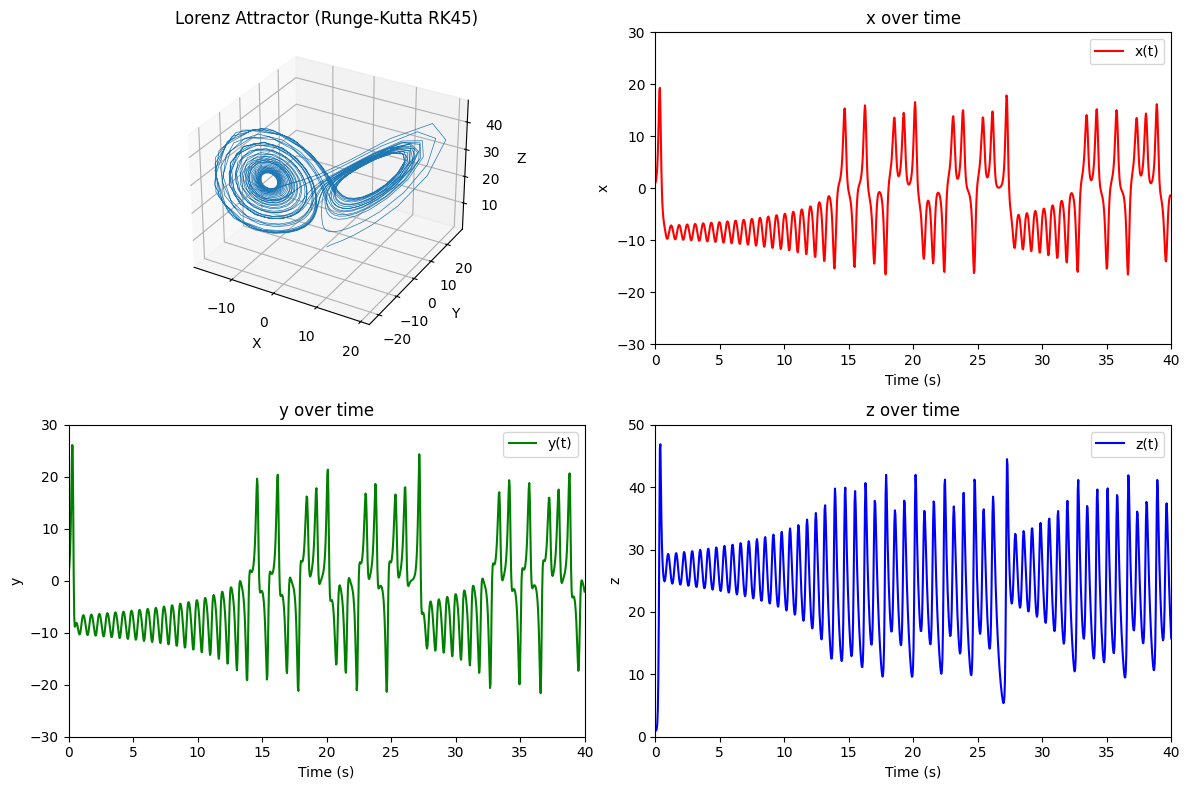

In [14]:
# Create figure and 2D Lorenz attractor plot
fig = plt.figure(figsize=(12, 8))
ax3d = fig.add_subplot(2, 2, 1, projection='3d')
ax3d.plot(solution.y[0], solution.y[1], solution.y[2], lw=0.5)
ax3d.set_title("Lorenz Attractor (Runge-Kutta RK45)")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# x over time
ax_xt = fig.add_subplot(2, 2, 2)
ax_xt.plot(solution.t, solution.y[0], 'r-', label='x(t)')
ax_xt.set_title('x over time')
ax_xt.set_xlabel('Time (s)')
ax_xt.set_ylabel('x')
ax_xt.set_xlim(t_span)
ax_xt.set_ylim(-30, 30)
ax_xt.legend()

# y over time
ax_yt = fig.add_subplot(2, 2, 3)
ax_yt.plot(solution.t, solution.y[1], 'g-', label='y(t)')
ax_yt.set_title('y over time')
ax_yt.set_xlabel('Time (s)')
ax_yt.set_ylabel('y')
ax_yt.set_xlim(t_span)
ax_yt.set_ylim(-30, 30)
ax_yt.legend()

# z over time
ax_zt = fig.add_subplot(2, 2, 4)
ax_zt.plot(solution.t, solution.y[2], 'b-', label='z(t)')
ax_zt.set_title('z over time')
ax_zt.set_xlabel('Time (s)')
ax_zt.set_ylabel('z')
ax_zt.set_xlim(t_span)
ax_zt.set_ylim(0, 50)
ax_zt.legend()

plt.tight_layout()
plt.show()